In [3]:
%pip install scipy
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter1d, gaussian_filter, gaussian_gradient_magnitude
from functions import *

Note: you may need to restart the kernel to use updated packages.


In [7]:
# standard deviation of the Gaussian kernel nad the number of standard deviations to consider
SIGMA  = 5
N = 4.5

# create the 1D kernel
kernel_1D = create_1D_kernel_2(SIGMA, N)
kernel_1D_grad = create_1D_kernel_grad_2(SIGMA, N)
assert np.allclose(kernel_1D.sum(), 1), "Kernel is not normalized"

In [5]:
def get_gray_image(path):
    image_original = skimage.io.imread(path)
    return skimage.img_as_float(image_original)


image = get_gray_image(f"data/fibres_xcth.png")

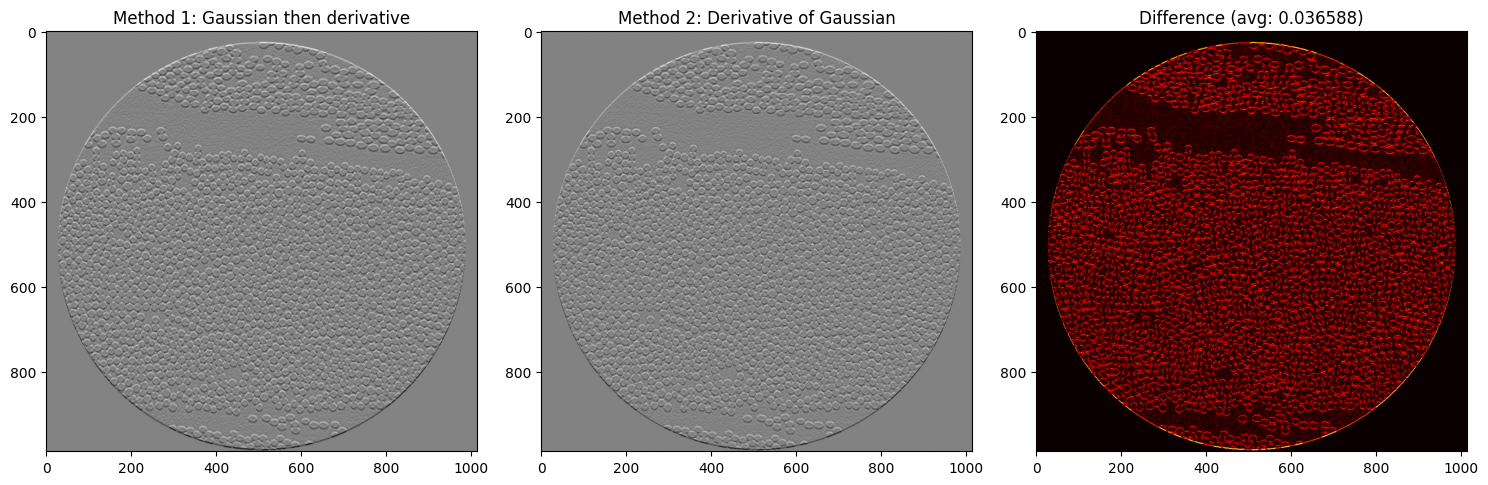

Average absolute difference between methods: 0.036588


In [6]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

def verify_gaussian_derivative(image, sigma=1.0, n=3):
    # Create 1D Gaussian kernel
    gaussian_kernel = create_1D_kernel_2(sigma, n)
    
    # Method 1: Convolve with Gaussian, then take derivative
    # First convolve with Gaussian
    smoothed = convolve_columns(image, gaussian_kernel)
    
    # Then take derivative using [0.5, 0, -0.5] kernel
    derivative_kernel = np.array([0.5, 0, -0.5])
    result1 = convolve_columns(smoothed, derivative_kernel)
    
    # Method 2: Convolve with derivative of Gaussian directly
    gaussian_derivative_kernel = create_1D_kernel_grad_2(sigma, n)
    result2 = convolve_columns(image, gaussian_derivative_kernel)
    
    # Compare results
    difference = np.abs(result1 - result2)
    avg_difference = np.mean(difference)
    
    return result1, result2, difference, avg_difference

# Test with a sample image (you can replace this with your actual image)
def test_verification():
    # Create a simple test image (e.g., a gradient)
    # Replace test_image creation with your image
    image = get_gray_image("data/fibres_xcth.png")
    result1, result2, difference, avg_diff = verify_gaussian_derivative(image)
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(result1, cmap='gray')
    plt.title('Method 1: Gaussian then derivative')
    
    plt.subplot(132)
    plt.imshow(result2, cmap='gray')
    plt.title('Method 2: Derivative of Gaussian')
    
    plt.subplot(133)
    plt.imshow(difference, cmap='hot')
    plt.title(f'Difference (avg: {avg_diff:.6f})')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Average absolute difference between methods: {avg_diff:.6f}")

# Run the test
test_verification()